<a href="https://colab.research.google.com/github/andy311p/format/blob/master/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simulation of two competing companies
One of the best ways to evaluate the efficacy of a statistical approach is to perform a Monte Carlo simulation on synthetic data.

So, let’s simulate a company that makes decisions based on the mean competing against a company that makes decisions based on the median.

A *relatively* simple business decision we can simulate is an A/B test. In an A/B test, a company faces the decision of releasing two different versions (variants) of a product — A and B.

For simplicity, we will simulate this as a “winner take all” test, meaning that the companies choose the variant that appears better from the test without calculating statistical significance. **This approach is reasonable when there is no control group, and the business question is relatively low risk.**

Before releasing variant A or B to the entire customer base, the company tests variant A with a sample of customers and variant B with a different sample of customers.

Based on the performance of variants A and B in the test, the company chooses to release either variant A or variant B to the entire customer base.

Here is a summary of the setup. On each simulation:

1.   We will randomly generate two skewed distributions. These distributions represent the true distributions for the revenue per user for variants A and B.
2.   To decide which variant to release, the companies will analyze a dataset consisting of 1,000 draws from variant A’s distribution and 1,000 draws from variant B’s distribution. These draws comprise the “test dataset.”
3. To isolate the impact of the decision-making approach, both companies analyze the same A/B test dataset.
4. Each company will choose either A or B based on the test dataset.
5. After choosing a variant, each company launches its preferred variant “at scale” to its entire customer base. We will simulate this step by generating 100,000 draws from each company’s chosen distribution. These draws represent the revenue received from each company’s 100,000 customers.
6. The business objective is to maximize the total revenue, so we will evaluate each company’s decision-making policy based on each company's total revenue when it releases its preferred variant at scale.

Now let’s get into the Python implementation. The full implementation is available on: https://github.com/tbuffington7/a-tale-of-two-companies/blob/main/simulation.ipynb . I encourage readers to experiment with it to understand how different decision-making frameworks lead to different business outcomes.

First, we need to write a function that generates random skewed distribution. I chose log-normal distributions as they are a common model for skewed data.

Recall that if a variable x has a log-normal distribution, log(x) has a normal distribution. I find it intuitive to characterize the parameters of the log-normal distribution based on the mean (mu) and the standard deviation (sigma) of the underlying normal distribution.

In this function, we randomly draw mu from a uniform distribution between 0 and 0.5 and draw sigma from a uniform distribution between 1 and 1.5:

(array([62., 46., 47., 43., 55., 52., 46., 60., 47., 49., 59., 41., 54.,
        49., 43., 37., 46., 56., 46., 62.]),
 array([9.96872220e-03, 5.08100725e-01, 1.00623273e+00, 1.50436473e+00,
        2.00249673e+00, 2.50062874e+00, 2.99876074e+00, 3.49689274e+00,
        3.99502475e+00, 4.49315675e+00, 4.99128875e+00, 5.48942075e+00,
        5.98755276e+00, 6.48568476e+00, 6.98381676e+00, 7.48194877e+00,
        7.98008077e+00, 8.47821277e+00, 8.97634478e+00, 9.47447678e+00,
        9.97260878e+00]),
 <BarContainer object of 20 artists>)

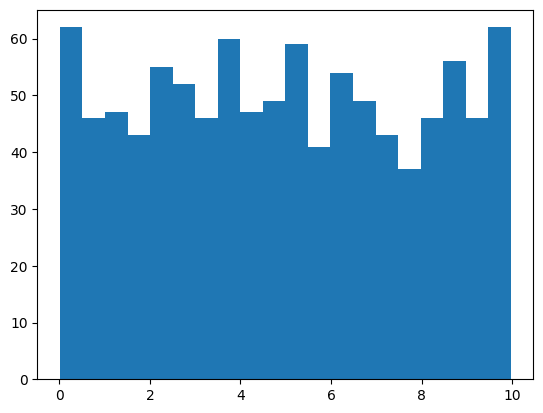

In [48]:
# generate 10000 samples of a uniform distribution
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

x = np.random.uniform(0,10,1000)
plt.hist(x, bins=20)

(array([  6.,  25.,  74., 162., 221., 204., 179.,  94.,  28.,   7.]),
 array([-3.03772489, -2.43496637, -1.83220785, -1.22944933, -0.6266908 ,
        -0.02393228,  0.57882624,  1.18158476,  1.78434328,  2.3871018 ,
         2.98986032]),
 <BarContainer object of 10 artists>)

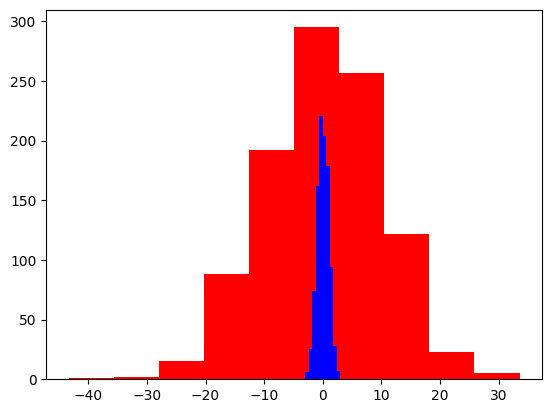

In [91]:
# generate 1000 samples from a Gaussian distributions and plot
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

x = np.random.normal(0,10,1000)
y = np.random.normal(0,1,1000)

plt.hist(x,color="red")
plt.hist(y,color="blue")

Probability to get 1.96 is: 0.058440944333451476
Probability to be less than 1.96 is: 0.9750021048517795


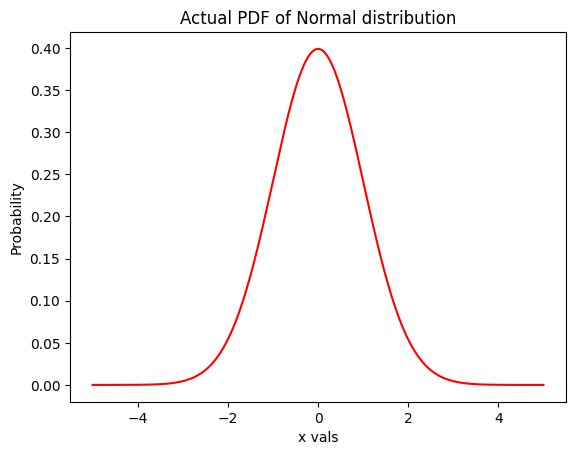

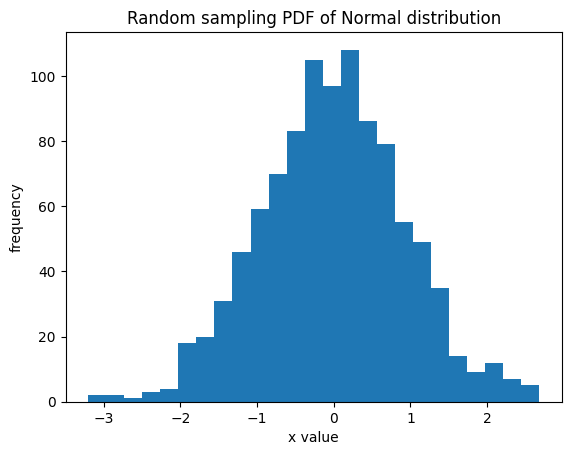

In [89]:
#generate 1000 random samples of normal distribution
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

mean=0
std=1
normal_dist = stats.norm(mean,std)

print("Probability to get 1.96 is: {}".format(normal_dist.pdf(1.96)))
print("Probability to be less than 1.96 is: {}".format(normal_dist.cdf(1.96)))

y = np.linspace(-5,5,1000)
plt.plot(y,normal_dist.pdf(y),color="r")
plt.xlabel('x vals')
plt.ylabel('Probability')
plt.title('Actual PDF of Normal distribution')
plt.show()

normal_dist.random_state=10
x = normal_dist.rvs(1000)

plt.hist(x,bins=25)
plt.xlabel("x value")
plt.ylabel("frequency")
plt.title("Random sampling PDF of Normal distribution")
plt.show()